In [ ]:
#Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
tf.config.run_functions_eagerly(True)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalMaxPool1D, Conv1D
from keras.layers import Embedding
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import utils

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

#helps in modelling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import plot_model

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
nltk.download('punkt')

from nltk.corpus import stopwords

nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# split data into train and test set
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Reading Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP_2023/Project/tweets.csv')
df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
df1=df.copy()

In [ ]:
df1

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [ ]:
#Dropping unwanted columns

In [ ]:
df1.drop(['id','keyword','location'],axis=1,inplace=True)
df1

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...
11365,Media should have warned us well in advance. T...,0
11366,i feel directly attacked 💀 i consider moonbin ...,0
11367,i feel directly attacked 💀 i consider moonbin ...,0
11368,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [ ]:
#Drop Duplicates

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
df1

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...
11365,Media should have warned us well in advance. T...,0
11366,i feel directly attacked 💀 i consider moonbin ...,0
11367,i feel directly attacked 💀 i consider moonbin ...,0
11368,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [ ]:
# Analyzing the number of word , sentence length

In [ ]:
df1['num_characters'] = df1['text'].apply(lambda x:len(x))
df1.head()

,text,target,num_characters
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1,125
1,Telangana: Section 144 has been imposed in Bha...,1,131
2,Arsonist sets cars ablaze at dealership https:...,1,63
3,Arsonist sets cars ablaze at dealership https:...,1,87
4,"""Lord Jesus, your love brings freedom and pard...",0,140


<Axes: ylabel='target'>

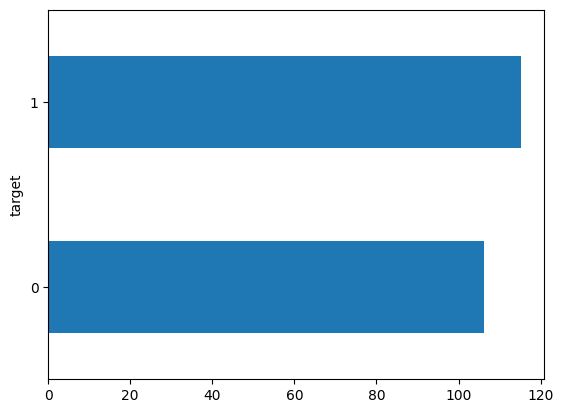

In [ ]:
df1.groupby('target')['num_characters'].mean().plot(kind='barh')

In [ ]:
#more the number of characters in the text then it is disaster tweet

In [ ]:
# num of words
df1['num_words'] = df1['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df1.head()

,text,target,num_characters,num_words
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1,125,23
1,Telangana: Section 144 has been imposed in Bha...,1,131,26
2,Arsonist sets cars ablaze at dealership https:...,1,63,9
3,Arsonist sets cars ablaze at dealership https:...,1,87,12
4,"""Lord Jesus, your love brings freedom and pard...",0,140,28


<Axes: ylabel='target'>

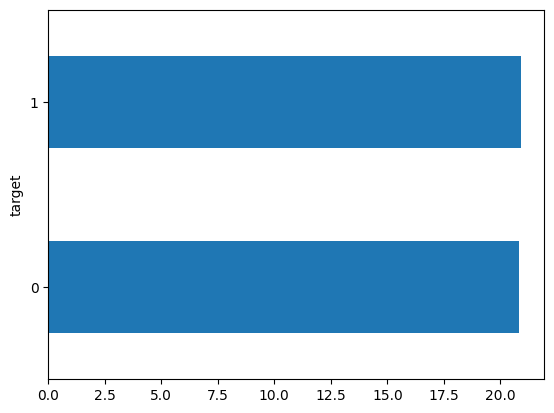

In [ ]:
df1.groupby('target')['num_words'].mean().plot(kind='barh')

In [ ]:
#from above we cannot conclude for number of words whether tweet is of disaster or not

In [ ]:
#Analyzing the target variable

<Axes: >

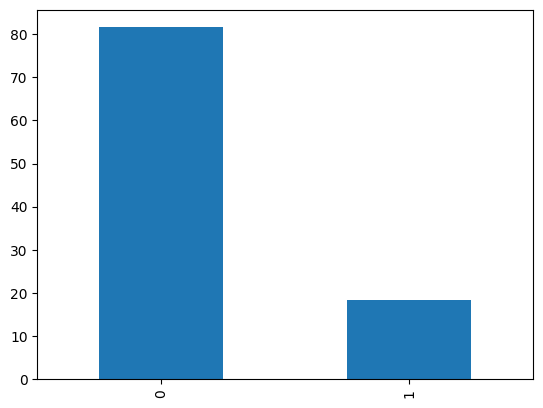

In [ ]:
(df1['target'].value_counts(normalize=True)*100).plot(kind='bar')

In [ ]:
#Disaster tweets are less

#### Processing the text

1.   Punctuation marks ,lowering the text ,stowpwords removal
2.   Stemming /Lemmatization

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(word=i))


    return " ".join(y)

In [ ]:
df1['text_v1']=df1['text'].apply(transform_text)

In [ ]:
df1.head()

,text,target,num_characters,num_words,text_v1
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1,125,23,commun violenc bhainsa telangana stone pelt mu...
1,Telangana: Section 144 has been imposed in Bha...,1,131,26,telangana section 144 impos bhainsa januari 13...
2,Arsonist sets cars ablaze at dealership https:...,1,63,9,arsonist set car ablaz dealership http
3,Arsonist sets cars ablaze at dealership https:...,1,87,12,arsonist set car ablaz dealership http http
4,"""Lord Jesus, your love brings freedom and pard...",0,140,28,lord jesu love bring freedom pardon fill holi ...


In [ ]:
df1.shape

(11225, 5)

In [ ]:
df1=df1[df1['text_v1'].apply(lambda x:len(x)>0)]
df1.shape

(11219, 5)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#creating vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=2000)

In [ ]:
vectorizer.fit(df1.text_v1)

TfidfVectorizer(max_features=2000, ngram_range=(1, 2))

In [ ]:
vectorizer.get_feature_names_out()[:100]

array(['10', '10 year', '100', '11', '12', '120', '13', '14', '15', '16',
       '17', '176', '18', '1st', '20', '200', '2014', '2016', '2017',
       '2018', '2019', '2020', '21', '24', '28', '30', '3rd', '40', '50',
       '60', '75', '80', '90', 'abandon', 'abl', 'ablaz', 'absolut',
       'abus', 'accept', 'access', 'accid', 'accident', 'accord',
       'account', 'accus', 'acid', 'across', 'act', 'action', 'activ',
       'activ http', 'activist', 'actor', 'actual', 'ad', 'add',
       'address', 'administr', 'admit', 'ador', 'advanc', 'advic',
       'advisori', 'af', 'affect', 'afghanistan', 'africa', 'aftershock',
       'age', 'agenc', 'agenda', 'ago', 'agre', 'ah', 'ahead', 'aid',
       'aim', 'air', 'air forc', 'air qualiti', 'airlin', 'airplan',
       'airplan accid', 'airport', 'aka', 'al', 'alarm', 'album', 'alert',
       'alert gt', 'alert sever', 'aliv', 'allegedli', 'alli', 'allow',
       'almost', 'alon', 'along', 'alreadi', 'also'], dtype=object)

Splitting the data

In [ ]:
X = df1['text_v1'].values
y = df1['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Artificial Neural Network

In [ ]:
t = Tokenizer()
t.fit_on_texts(X_train)
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
print(encoded_train[0:2])

[[6, 353, 4382, 1], [6366, 140, 567, 1063, 15, 61, 516, 21, 1653, 1427, 165, 33, 671, 13]]


In [ ]:
max_length = 25
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
print(padded_train)

[[    6   353  4382 ...     0     0     0]
 [ 6366   140   567 ...     0     0     0]
 [   78   407  1428 ...     0     0     0]
 ...
 [  360  2143   504 ...     0     0     0]
 [   17   846  3155 ...     0     0     0]
 [ 1216     9 13135 ...     0     0     0]]


In [ ]:
### calculate vocabulary size , no of unique tokens(words/sentences)
vocab_size = len(t.word_index) + 1

In [ ]:
#define the model
model = Sequential()
model.add(Embedding(vocab_size, 35, input_length=max_length))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 35)            459900    
                                                                 
 flatten (Flatten)           (None, 875)               0         
                                                                 
 dropout (Dropout)           (None, 875)               0         
                                                                 
 dense (Dense)               (None, 12)                10512     
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 470,425
Trainable params: 470,425
Non-trai

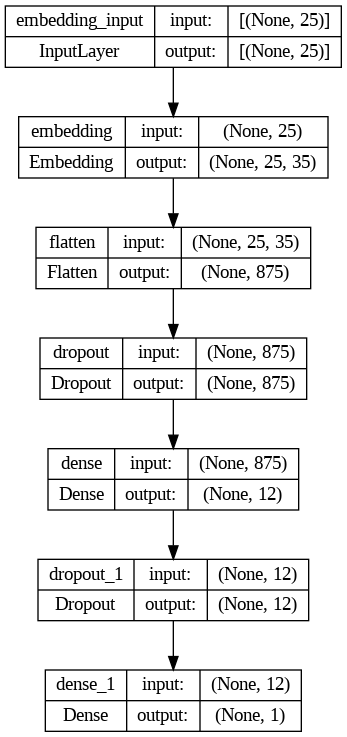

In [ ]:
plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)


# fit the model
model.fit(x=padded_train,
         y=y_train,
         epochs=30,
         validation_data=(padded_test, y_test), verbose=1,
         callbacks=[early_stop]
         )

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


281/281 [==============================] - 16s 58ms/step - loss: 0.4464 - accuracy: 0.8242 - val_loss: 0.3423 - val_accuracy: 0.8659
Epoch 2/30
281/281 [==============================] - 16s 56ms/step - loss: 0.2364 - accuracy: 0.9143 - val_loss: 0.2983 - val_accuracy: 0.8864
Epoch 3/30
281/281 [==============================] - 16s 57ms/step - loss: 0.1109 - accuracy: 0.9636 - val_loss: 0.3363 - val_accuracy: 0.8859
Epoch 4/30
281/281 [==============================] - 16s 56ms/step - loss: 0.0491 - accuracy: 0.9860 - val_loss: 0.3845 - val_accuracy: 0.8788
Epoch 5/30
281/281 [==============================] - 17s 60ms/step - loss: 0.0265 - accuracy: 0.9932 - val_loss: 0.4241 - val_accuracy: 0.8792
Epoch 6/30
281/281 [==============================] - 17s 60ms/step - loss: 0.0209 - accuracy: 0.9949 - val_loss: 0.4721 - val_accuracy: 0.8810
Epoch 7/30
281/281 [==============================] - 15s 55ms/step - loss: 0.0177 - accuracy: 0.9960 - val_loss: 0.4885 - val_accuracy: 0.8788
Epo

71/71 [==============================] - 0s 5ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1832
           1       0.72      0.55      0.62       412

    accuracy                           0.88      2244
   macro avg       0.81      0.75      0.77      2244
weighted avg       0.87      0.88      0.87      2244

Accuracy : 0.8770053475935828


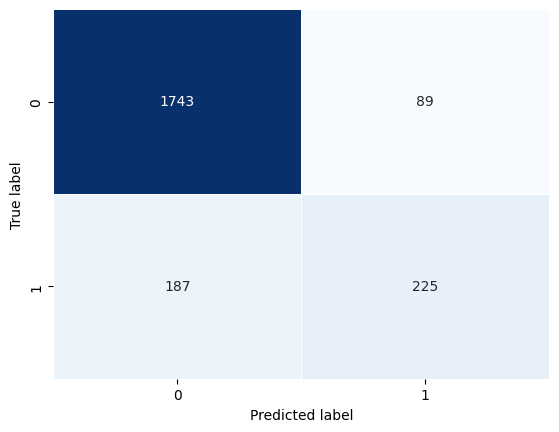

In [ ]:
def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')
preds = (model.predict(padded_test) > 0.5).astype("int32")
c_report(y_test, preds)

plot_confusion_matrix(y_test, preds)

Recurrent Neural Network

In [ ]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 35, input_length=max_length))

model.add(SimpleRNN(35, return_sequences=False))

model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 35)            459900    
                                                                 
 simple_rnn (SimpleRNN)      (None, 35)                2485      
                                                                 
 dense_2 (Dense)             (None, 1)                 36        
                                                                 
Total params: 462,421
Trainable params: 462,421
Non-trainable params: 0
_________________________________________________________________
None


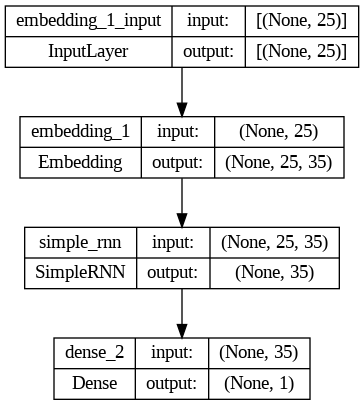

In [ ]:
plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)


# fit the model
model.fit(x=padded_train,
         y=y_train,
         epochs=30,
         validation_data=(padded_test, y_test), verbose=1,
         callbacks=[early_stop]
         )

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


281/281 [==============================] - 32s 114ms/step - loss: 0.3725 - accuracy: 0.8547 - val_loss: 0.3667 - val_accuracy: 0.8694
Epoch 2/30
281/281 [==============================] - 32s 114ms/step - loss: 0.2458 - accuracy: 0.9115 - val_loss: 0.3481 - val_accuracy: 0.8810
Epoch 3/30
281/281 [==============================] - 32s 112ms/step - loss: 0.1858 - accuracy: 0.9385 - val_loss: 0.3557 - val_accuracy: 0.8801
Epoch 4/30
281/281 [==============================] - 31s 111ms/step - loss: 0.1376 - accuracy: 0.9528 - val_loss: 0.4057 - val_accuracy: 0.8690
Epoch 5/30
281/281 [==============================] - 31s 110ms/step - loss: 0.0996 - accuracy: 0.9665 - val_loss: 0.4181 - val_accuracy: 0.8690
Epoch 6/30
281/281 [==============================] - 32s 113ms/step - loss: 0.0764 - accuracy: 0.9745 - val_loss: 0.4525 - val_accuracy: 0.8405
Epoch 7/30
281/281 [==============================] - 31s 110ms/step - loss: 0.0611 - accuracy: 0.9799 - val_loss: 0.4677 - val_accuracy: 0.8

71/71 [==============================] - 3s 44ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1832
           1       0.49      0.60      0.54       412

    accuracy                           0.81      2244
   macro avg       0.70      0.73      0.71      2244
weighted avg       0.83      0.81      0.82      2244

Accuracy : 0.8101604278074866


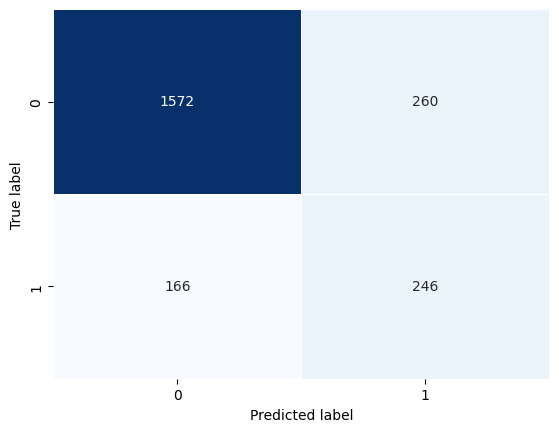

In [ ]:
def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')
preds = (model.predict(padded_test) > 0.5).astype("int32")
c_report(y_test, preds)

plot_confusion_matrix(y_test, preds)

Long Short Term Memory

In [ ]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 35, input_length=max_length))

model.add(LSTM(35, return_sequences=False))

model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 25, 35)            459900    
                                                                 
 lstm (LSTM)                 (None, 35)                9940      
                                                                 
 dense_3 (Dense)             (None, 1)                 36        
                                                                 
Total params: 469,876
Trainable params: 469,876
Non-trainable params: 0
_________________________________________________________________
None


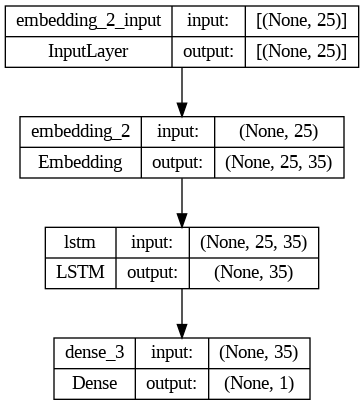

In [ ]:
plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# fit the model
model.fit(x=padded_train,
         y=y_train,
         epochs=30,
         validation_data=(padded_test, y_test), verbose=1,
         callbacks=[early_stop]
         )

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


281/281 [==============================] - 41s 144ms/step - loss: 0.3857 - accuracy: 0.8474 - val_loss: 0.3295 - val_accuracy: 0.8752
Epoch 2/30
281/281 [==============================] - 41s 147ms/step - loss: 0.2535 - accuracy: 0.9081 - val_loss: 0.3124 - val_accuracy: 0.8775
Epoch 3/30
281/281 [==============================] - 42s 148ms/step - loss: 0.2081 - accuracy: 0.9281 - val_loss: 0.3229 - val_accuracy: 0.8694
Epoch 4/30
281/281 [==============================] - 42s 151ms/step - loss: 0.1836 - accuracy: 0.9377 - val_loss: 0.3277 - val_accuracy: 0.8743
Epoch 5/30
281/281 [==============================] - 41s 146ms/step - loss: 0.1642 - accuracy: 0.9446 - val_loss: 0.3659 - val_accuracy: 0.8734
Epoch 6/30
281/281 [==============================] - 41s 145ms/step - loss: 0.1468 - accuracy: 0.9532 - val_loss: 0.3810 - val_accuracy: 0.8761
Epoch 7/30
281/281 [==============================] - 41s 146ms/step - loss: 0.1337 - accuracy: 0.9584 - val_loss: 0.3291 - val_accuracy: 0.8

71/71 [==============================] - 3s 46ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1832
           1       0.64      0.59      0.62       412

    accuracy                           0.86      2244
   macro avg       0.78      0.76      0.77      2244
weighted avg       0.86      0.86      0.86      2244

Accuracy : 0.8645276292335116


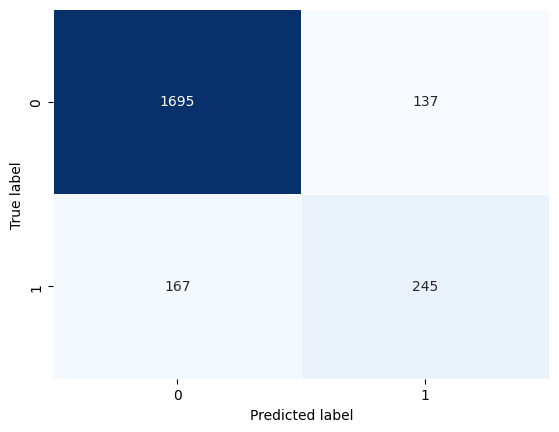

In [ ]:
def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')
preds = (model.predict(padded_test) > 0.5).astype("int32")
c_report(y_test, preds)

plot_confusion_matrix(y_test, preds)

In [ ]:
#Accuracy obtained by ANN model is greater as compared to RNN & LSTM models